In [63]:

# IMPORTING LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix

#Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor


In [2]:

# IMPORTING DATASET

df=pd.read_csv(r"D:\Priyal\From College\CODING\Python ML Project\flood.csv")
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [3]:

# EXPLORATORY DATA ANALYSIS


In [4]:
#checking for null values
df.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [6]:
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


In [7]:
df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Heatmap')

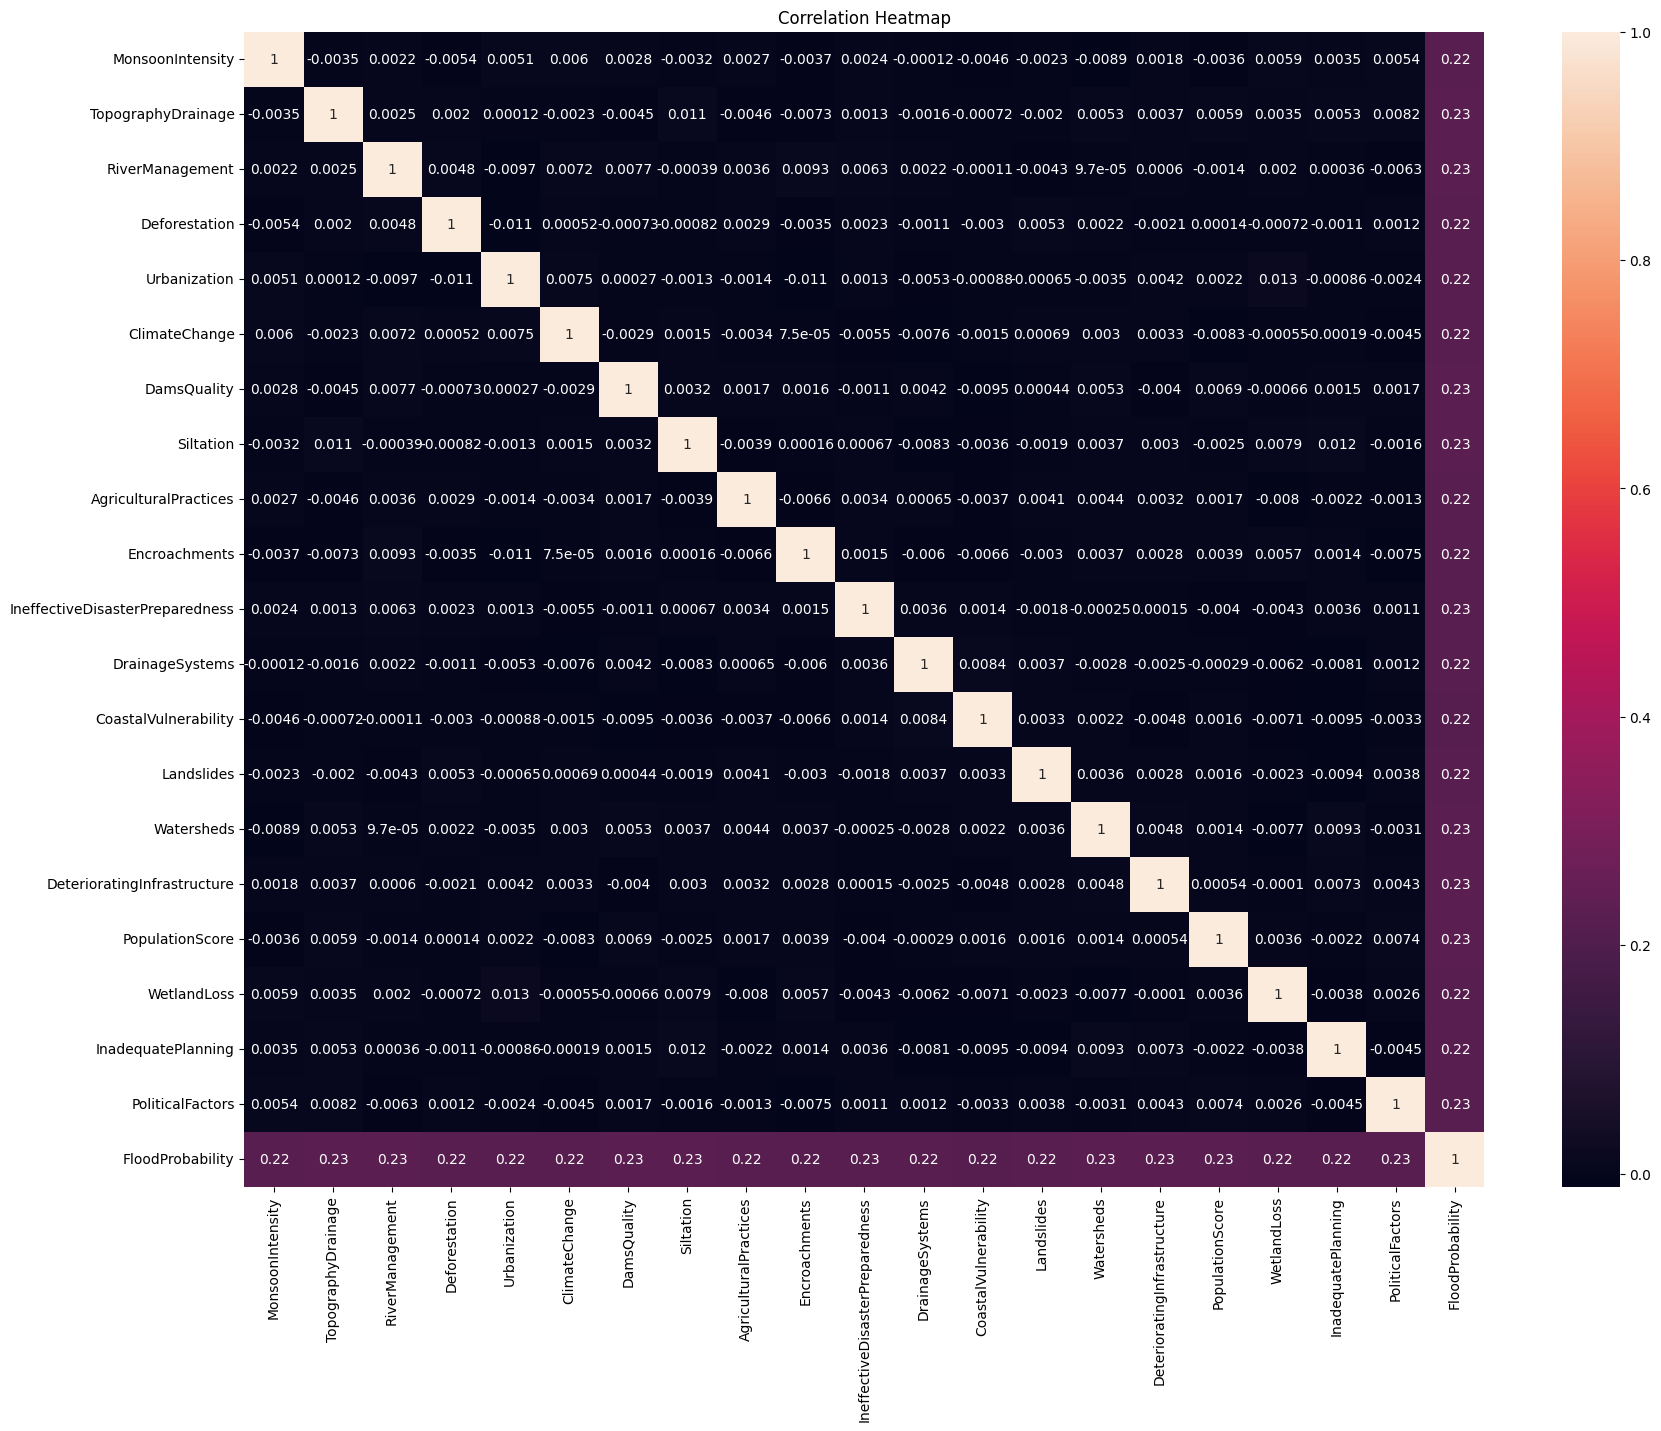

In [8]:
%matplotlib inline

corr = df[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability']].corr()

#Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')

In [9]:

# DATA PREPROCESSING


In [10]:
#Input
X=df.drop(['FloodProbability'],axis='columns')
X.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,3,8,6,6,4,4,6,2,3,2,5,10,7,4,2,3,4,3,2,6
1,8,4,5,7,7,9,1,5,5,4,6,9,2,6,2,1,1,9,1,3
2,3,10,4,1,7,5,4,7,4,9,2,7,4,4,8,6,1,8,3,6
3,4,4,2,7,3,4,1,4,6,4,9,4,2,6,6,8,8,6,6,10
4,3,7,5,2,5,8,5,2,7,5,7,7,6,5,3,3,4,4,3,4


In [11]:
#Target
y=df['FloodProbability']
y.head()

0    0.450
1    0.475
2    0.515
3    0.520
4    0.475
Name: FloodProbability, dtype: float64

In [12]:
#Standardizing input
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [13]:
#Applying PCA
pca=PCA(0.95)
X=pca.fit_transform(X)

#pca gives numpy array so converting it back to df
X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2.874710,0.387969,0.446951,0.389410,-0.634913,-1.863121,0.601505,1.016634,-0.618981,-0.996786,-0.385489,-0.242440,1.564307,0.820246,-0.296448,-0.539630,-0.395084,-0.289115,0.377128
1,0.674721,2.198435,-2.562340,-0.328104,0.133221,-0.779086,2.623107,0.204497,-1.095927,0.886842,1.043546,-0.407815,0.742916,0.225466,1.555655,-0.719423,2.089896,0.057152,-0.478866
2,-1.567035,0.634858,0.639772,-0.417030,-1.724476,0.229331,-0.320138,0.841091,0.957926,-0.831706,1.098602,-1.331735,0.539453,2.360521,2.384135,0.234033,0.365931,-0.414076,1.063718
3,0.014448,0.094412,2.283706,0.297989,1.068315,0.079682,0.817750,-2.515729,1.572000,0.721463,0.061030,1.313290,0.246432,-0.017411,-0.094274,0.488823,1.112216,0.898464,-1.126085
4,1.482442,0.345402,-0.937020,-0.577262,0.008798,-0.514191,-0.186314,0.945791,0.383690,0.239349,-0.482127,0.065525,0.090065,1.764407,0.059680,-1.319290,0.635484,0.150387,0.944435


In [14]:
#splitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
18165,-1.068290,-1.657475,0.043891,-0.412309,-0.804148,-0.577958,-1.808806,0.055611,-1.171152,-0.807319,0.683206,0.454198,0.830026,-1.051965,1.087256,0.039335,1.625189,0.874078,1.694172
36059,-0.527753,1.823460,-0.456389,-0.419987,-1.466868,-0.794563,0.122017,1.082118,0.160368,0.982168,-0.143944,-1.232050,0.598253,-0.466787,0.374107,2.509643,1.579805,1.072197,-0.173366
13242,-0.857575,-0.251700,0.097337,-1.168141,0.286878,0.322597,-0.319646,0.412873,0.727255,-0.987303,-1.137125,-1.250188,0.397980,0.828809,-0.817987,0.359802,1.247047,0.180960,-0.878193
32985,-0.161585,-0.351733,1.319467,-1.246065,-1.934380,0.401747,-0.587462,-0.388036,-1.603469,-0.477933,0.169268,-0.335491,0.652878,-1.447591,-0.062022,0.759289,-0.504954,0.813417,-0.270571
41133,-1.426126,0.262433,0.479297,1.165980,-1.745868,-1.201919,-0.532935,-1.557251,-0.736541,-0.435608,0.506143,-2.453751,-0.198891,-0.171418,-0.574208,-0.013577,0.893315,-0.480382,-1.111282


In [16]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
26247,-0.375815,-1.132693,0.308484,0.858221,0.523776,0.226545,0.158777,-0.739671,-0.361381,-0.414263,1.058509,-0.276610,1.519443,-0.360114,-1.362827,0.796131,0.335737,-1.396468,0.039002
35067,-0.807527,-0.531483,0.717989,-0.208240,-0.590260,0.132629,0.330261,-0.285356,-1.219716,0.983579,0.047044,-0.160205,-1.013692,-0.406774,-0.006124,-0.181196,1.040190,1.436381,0.508718
34590,0.949181,-1.694618,-1.460828,0.292598,-2.019542,1.065571,-1.830893,-1.199479,0.551970,-0.501381,0.218177,0.659111,-1.151799,0.937053,-0.995733,-1.112359,-0.253589,0.336782,0.411718
16668,0.337094,-0.556259,0.708133,0.223989,-1.289570,0.686616,-0.665991,0.518089,-0.614797,-0.873750,-3.769923,-0.201079,-0.228624,-0.631397,-1.001176,0.001249,-0.790694,-0.709902,0.175324
12196,0.676079,-0.230567,0.193545,3.559183,0.391643,1.530131,1.420706,-0.038851,1.496016,-0.892899,-0.308044,0.006860,0.928048,-0.022147,1.057014,1.463222,0.847873,0.304804,0.378583


In [17]:
y_train.head()

18165    0.545
36059    0.530
13242    0.495
32985    0.455
41133    0.425
Name: FloodProbability, dtype: float64

In [18]:
y_test.head()

26247    0.505
35067    0.525
34590    0.400
16668    0.455
12196    0.590
Name: FloodProbability, dtype: float64

In [19]:

# MODEL SEELCTION


In [20]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
lr.score(X_test,y_test)

0.9932937951307399

In [57]:
rfr=RandomForestRegressor(random_state=1)
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [58]:
rfr.score(X_test,y_test)

0.8329058237457381

In [24]:
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [25]:
svr.score(X_test,y_test)

0.7178408712925194

In [26]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [27]:
gbr.score(X_test,y_test)

0.8756042297327693

In [108]:
#Performance Evaluation

In [74]:
models={
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=1),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

results=[]

for name, model in models.items():
    model.fit(X_train,y_train)
    
    y_pred=model.predict(X_test)
    
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    
    results.append({
        'model':name,
        'mse':mean_squared_error(y_test,y_pred),
        'r2':r2_score(y_test,y_pred)
    })

In [75]:
df = pd.DataFrame(results,columns=['model','mse','r2'])
df

,model,mse,r2
0,Linear Regression,0.000017,0.993294
1,Random Forest,0.000424,0.832906
2,Support Vector Regressor,0.000716,0.717841
3,Gradient Boosting Regressor,0.000316,0.875604


In [110]:
#Visualization

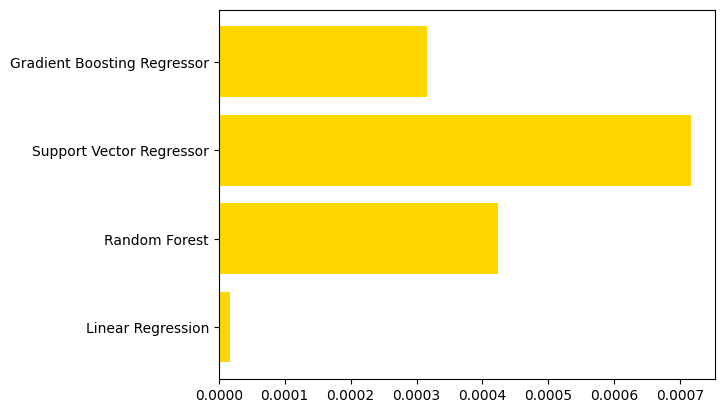

In [102]:
%matplotlib inline
plt.barh(df.model,df.mse,color='gold')
plt.show()

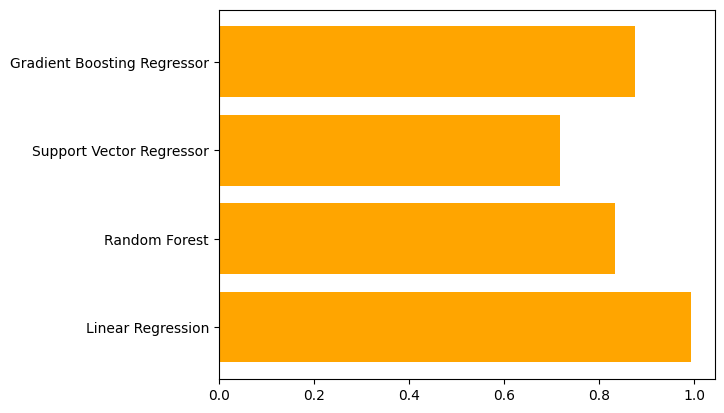

In [104]:
%matplotlib inline
plt.barh(df.model,df.r2,color='orange')
plt.show()